In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Only needed in Colab


In [2]:
# Upload the image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving handwriting.jpg to handwriting.jpg


In [3]:
# Read and preprocess image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:

# Adaptive thresholding to handle varying backgrounds
thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    15, 10
)

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [6]:
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [7]:
bounding_boxes = [cv2.boundingRect(c) for c in contours]
sorted_contours = [c for _, c in sorted(zip(bounding_boxes, contours), key=lambda b: (b[0][1], b[0][0]))]


In [8]:
# Filter and extract character regions
char_images = []
for cnt in sorted_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 5 and h > 10:
        char_img = closed[y:y+h, x:x+w]
        char_images.append(char_img)


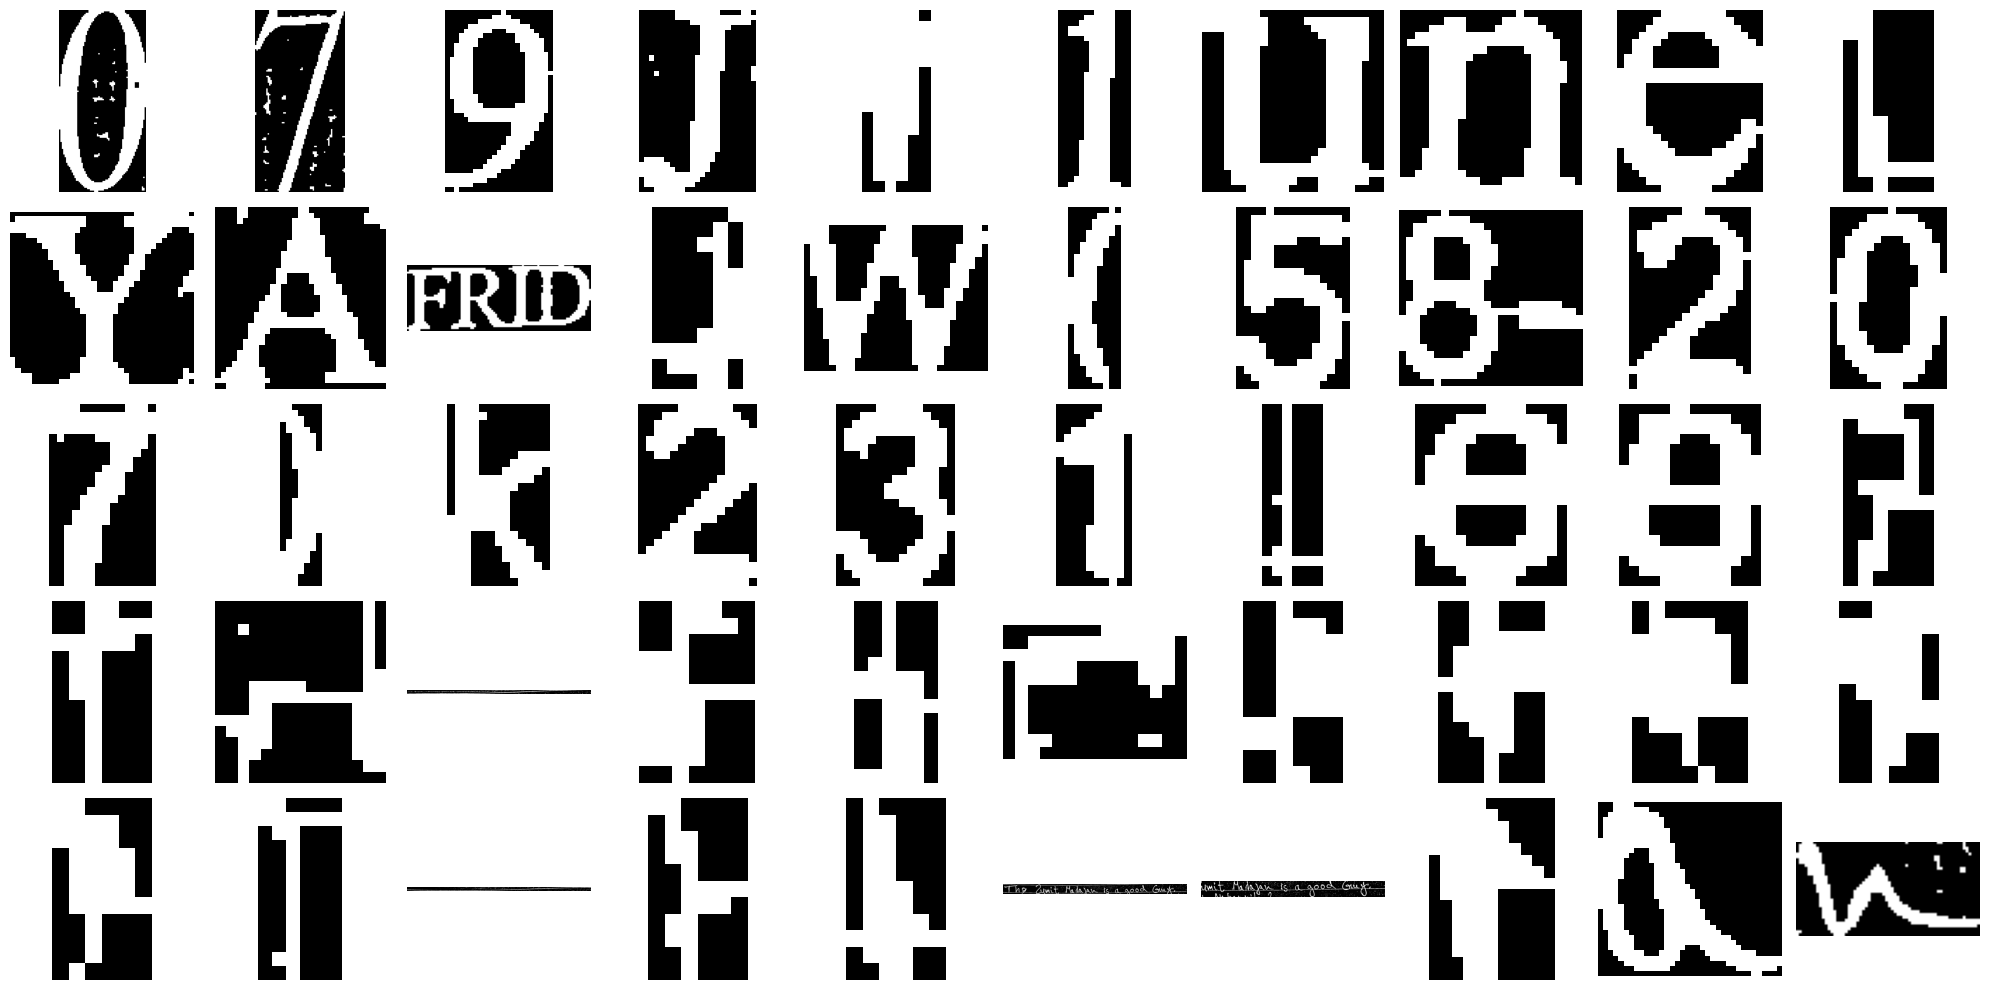

In [9]:
# Display tokens
plt.figure(figsize=(20, 10))
for i, char_img in enumerate(char_images[:50]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(char_img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
